Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8261 - loss: 0.5521
Epoch 1: saving model to weights/weights_epoch_01.weights.h5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8262 - loss: 0.5518 - val_accuracy: 0.9837 - val_loss: 0.0535
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9715 - loss: 0.0989
Epoch 2: saving model to weights/weights_epoch_02.weights.h5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9715 - loss: 0.0989 - val_accuracy: 0.9880 - val_loss: 0.0419
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9792 - loss: 0.0694
Epoch 3: saving model to weights/weights_epoch_03.weights.h5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9792 - loss: 0.0694 - val_accuracy: 0.9898 - val_loss: 0.0348
Epoch 4/10
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9836 - loss: 0.0543
Epoch 4: saving model to weights/weights_epoch_04.weights.h5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accura

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9904 - loss: 0.0294
Test Accuracy: 99.26%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion Matrix:
[[ 977    0    0    0    1    0    1    0    0    1]
 [   0 1131    0    1    1    1    0    1    0    0]
 [   3    0 1025    0    2    0    0    2    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    0    0    0  979    0    0    0    1    2]
 [   1    0    0    4    0  882    2    1    0    2]
 [   3    2    1    0    1    1  950    0    0    0]
 [   0    0    4    2    0    0    0 1016    1    5]
 [   1    0    3    1    1    0    1    1  963    3]
 [   0    0    0    0    5    4    0    0    1  999]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4      

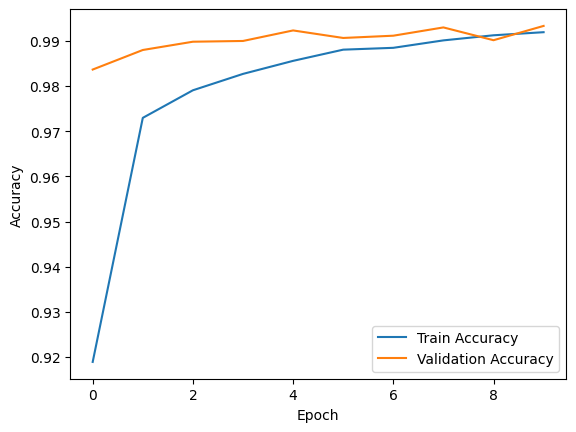

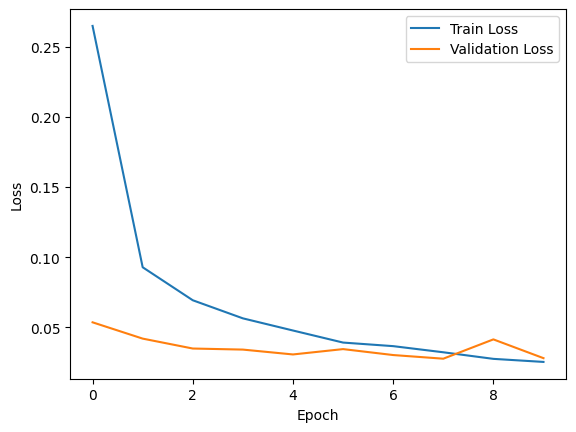

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

# Create a directory to save weights
os.makedirs("weights", exist_ok=True)

# Step 1: Load the MNIST Dataset using TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the data to include the channel dimension and normalize pixel values
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Save weights after each epoch
checkpoint = ModelCheckpoint(
    filepath="weights/weights_epoch_{epoch:02d}.weights.h5",  # Save weights with the epoch number in the filename
    save_weights_only=True,  # Save only weights
    save_best_only=False,    # Save weights for all epochs
    verbose=1
)

# Step 4: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=[checkpoint]  # Include the checkpoint callback
)

# Save the final model
model.save("mnist_digit_recognition_model.h5")

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 6: Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
class_report = classification_report(y_true, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plotting accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


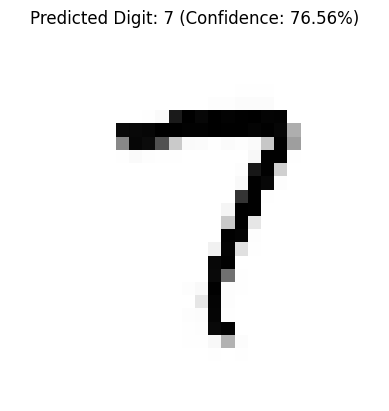

Predicted Digit: 7, Confidence: 76.56%


In [5]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the saved model
try:
    model = tf.keras.models.load_model("mnist_digit_recognition_model.h5")
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Function to preprocess a single input image
def preprocess_image(image_path):
    """
    Preprocesses the input image for MNIST digit recognition.
    - Converts the image to grayscale.
    - Resizes the image to 28x28 pixels.
    - Normalizes pixel values to the range [0, 1].
    - Reshapes the image to (1, 28, 28, 1) for model input.
    """
    try:
        # Load image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError("Failed to load image. Please check the file path.")

        # Resize to 28x28 pixels
        img = cv2.resize(img, (28, 28))

        # Normalize pixel values
        img = img.astype("float32") / 255.0

        # Reshape to (1, 28, 28, 1)
        img = np.expand_dims(img, axis=-1)
        img = np.expand_dims(img, axis=0)

        return img
    except Exception as e:
        print(f"Error during image preprocessing: {e}")
        return None

# Function to make predictions
def predict_digit(image_path):
    """
    Predicts the digit in the given image and returns the prediction and confidence level.
    """
    # Preprocess the image
    img = preprocess_image(image_path)
    if img is None:
        print("Image preprocessing failed. Cannot make a prediction.")
        return None, None

    try:
        # Make prediction
        prediction = model.predict(img)
        # Get the class with the highest probability
        predicted_class = np.argmax(prediction, axis=1)[0]
        confidence = np.max(prediction) * 100

        # Display the image and prediction
        plt.imshow(img[0, :, :, 0], cmap='gray')
        plt.title(f"Predicted Digit: {predicted_class} (Confidence: {confidence:.2f}%)")
        plt.axis("off")
        plt.show()

        return predicted_class, confidence
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\HP\OneDrive\Desktop\MNIST Model\test images 2.png"
predicted_digit, confidence = predict_digit(image_path)

if predicted_digit is not None:
    print(f"Predicted Digit: {predicted_digit}, Confidence: {confidence:.2f}%")
else:
    print("Prediction failed. Please check the image or model.")


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
